In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Regressão Linear

dados = {
    'idade': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'altura':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.9,0.95,1.0,1.0,1.1,1.3,1.32,1.5,1.6,1.62,1.75,1.80, 1.85],
    'peso': [1,3,12,16,17,20,30,32,32,30,33,32,40,45,52,56,62,59,75,82],
}

df1 = pd.DataFrame(dados)
df1.head(3)

,idade,altura,peso
0,1,0.3,1
1,2,0.4,3
2,3,0.5,12


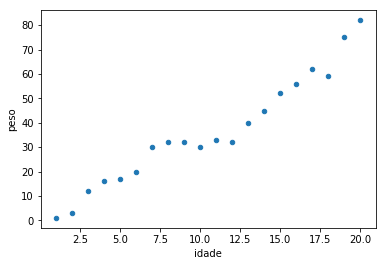

In [4]:
df1.plot(x='idade',y='peso',kind = 'scatter')

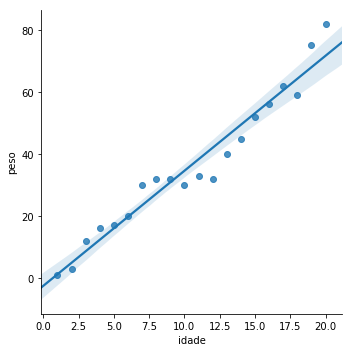

In [5]:
sns.lmplot(x='idade',y='peso',data = df1)

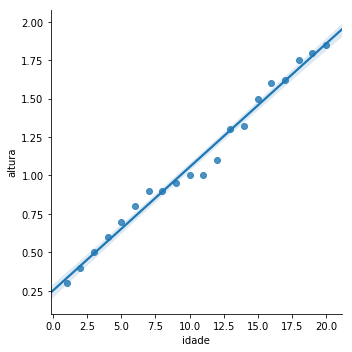

In [6]:
sns.lmplot(x='idade',y='altura',data = df1)

In [7]:

#DICA: SE VOCÊ CHAMAR X = df['idade'] ele cria um Array... e dá problema quando for fazer a regressão linear
X = df1[['idade','altura']]#Coloquei a coluna da idade e altura aqui (ex: faça o teste X = df1['idade'] para ver a diferença)
#ou
#X = df1.drop(['peso'],axis=1)# Retira a coluna peso


y = df1[['peso']]# E a do peso aqui

#Organizar os dados para o treinamento (guardar os arquivos)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,#Características dos dados
    y,# Dados que
    test_size=0.1,# 30% dos dados ficarão fora do treino e irão para os respectivos X_test e y_test
    #de maneira aleatória
)

print(len(X_train),len(y_train)) # 70% dos dados das respectivas colunas
print(len(X_test),len(y_test)) # 30% dos dados das respectivas colunas

18 18
2 2


In [8]:
X_train.head(3)

,idade,altura
18,19,1.8
14,15,1.5
9,10,1.0


In [9]:
X_test.head(3)

,idade,altura
15,16,1.60
13,14,1.32


In [10]:
y_train.head(3)

,peso
18,75
14,52
9,30


In [11]:
y_test.head(3)

,peso
15,56
13,45


In [12]:
# Treinar os dados pelo modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
y_train.head(1) # Aqui não entra ainda a coluna 'pred'

,peso
18,75


In [14]:
lm.fit(X_train,y_train)

pred = lm.predict(X_train) # predic do peso



# Não há necessidade em criar ... o y_train já é isso.
dispersao = pd.DataFrame(y_train) # PEso real
dispersao['Pred'] = pred

In [15]:
y_train.head(1) # Ao usar a função Pred, ele acrescenta na tabela y_train e y_test uma nova coluna ("Pred")

,peso,Pred
18,75,69.775809


In [16]:
#dispersao

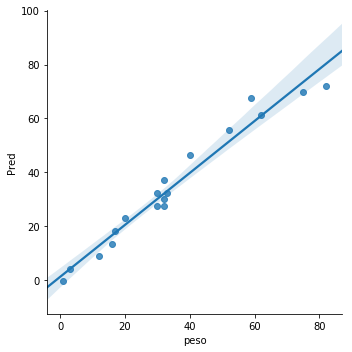

In [17]:
sns.lmplot(x = 'peso',y = 'Pred', data = y_train)

In [18]:
X_train

,idade,altura
18,19,1.80
14,15,1.50
9,10,1.00
2,3,0.50
3,4,0.60
11,12,1.10
10,11,1.00
6,7,0.90
7,8,0.90
1,2,0.40


In [19]:
lm.score(X_train,y_train['peso'])

0.962772103472559

In [20]:
lm.score(X_train,y_train['Pred'])

1.0

In [21]:
lm.score(X_test,y_test)

0.586522167091952

### E para idades maiores?

In [22]:
dados_previsao = {
    'idade': np.arange(15,33,1),
    'altura':[1.5,1.6,1.62,1.75,1.80, 1.85,1.86,1.87,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88],
    #'peso': [1,3,12,16,17,20,30,32,32,30,33,32,40,45,52,56,62,59,75,82],
}

df2 = pd.DataFrame(dados_previsao)
df2.head()


,idade,altura
0,15,1.50
1,16,1.60
2,17,1.62
3,18,1.75
4,19,1.80


In [23]:
new_pred = lm.predict(df2)

#new_pred

In [24]:
y_train['Pred2']= new_pred
    
y_train['idade2'] = np.arange(15,33,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
y_train

,peso,Pred,Pred2,idade2
18,75,69.775809,55.749583,15
14,52,55.749583,60.426109,16
9,30,32.366955,61.358733,17
2,12,8.991030,67.439222,18
3,16,13.667555,69.775809,19
11,32,37.040130,72.112396,20
10,33,32.363605,72.577033,21
6,30,27.697132,73.041670,22
7,32,27.693781,73.506307,23
1,3,4.314504,73.502956,24


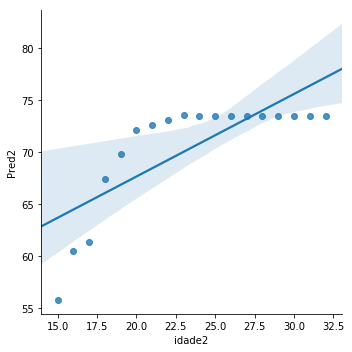

In [27]:
sns.lmplot(x = 'idade2',y = 'Pred2', data = y_train)